# Exercise 

    host='localhost',
    database='joelmendonsa',
    user='postgres',
    password='Duke#7539',
    port=5432

In [3]:
import yfinance as yf

# List of widely traded stocks
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'NVDA', 'JNJ', 'JPM', 'V']

# Fetch historical data for each stock over the last 10 years
for stock_symbol in stocks:
    stock = yf.Ticker(stock_symbol)
    data = stock.history(period="10y")  # Fetch data for the last 10 years
    print(f"Stock Symbol: {stock_symbol}")
    print(data)  # Print or process the historical data here


Stock Symbol: AAPL
                                 Open        High         Low       Close  \
Date                                                                        
2013-11-11 00:00:00-05:00   16.302553   16.355223   16.127611   16.273083   
2013-11-12 00:00:00-05:00   16.229817   16.425766   16.208812   16.303181   
2013-11-13 00:00:00-05:00   16.240157   16.373403   16.207551   16.322613   
2013-11-14 00:00:00-05:00   16.390959   16.593804   16.361488   16.558691   
2013-11-15 00:00:00-05:00   16.509163   16.587855   16.443639   16.459314   
...                               ...         ...         ...         ...   
2023-11-03 00:00:00-04:00  174.240005  176.820007  173.350006  176.649994   
2023-11-06 00:00:00-05:00  176.380005  179.429993  176.210007  179.229996   
2023-11-07 00:00:00-05:00  179.179993  182.440002  178.970001  181.820007   
2023-11-08 00:00:00-05:00  182.350006  183.449997  181.589996  182.889999   
2023-11-09 00:00:00-05:00  182.960007  184.115005  181.80

FB: No data found, symbol may be delisted


Stock Symbol: FB
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Stock Symbol: TSLA
                                 Open        High         Low       Close  \
Date                                                                        
2013-11-11 00:00:00-05:00    9.400000    9.694667    9.140000    9.646667   
2013-11-12 00:00:00-05:00    9.646000    9.646667    9.078667    9.186667   
2013-11-13 00:00:00-05:00    9.389333    9.491333    9.089333    9.246667   
2013-11-14 00:00:00-05:00    9.261333    9.360000    8.940667    9.173333   
2013-11-15 00:00:00-05:00    9.123333    9.196667    8.956667    9.030000   
...                               ...         ...         ...         ...   
2023-11-03 00:00:00-04:00  221.149994  226.369995  218.399994  219.960007   
2023-11-06 00:00:00-05:00  223.979996  226.320007  215.000000  219.270004   
2023-11-07 00:00:00-05:00  219.979996  223.119995  215.720001  222.179993   
2023-11-08 00:00:00-05:00  223.149994 

In [7]:
import psycopg2
import yfinance as yf

# Connect to PostgreSQL
conn = psycopg2.connect(
    host='localhost',
    database='joelmendonsa',
    user='postgres',
    password='Duke#7539',
    port=5432
)
cur = conn.cursor()

# Create table: stock_details to store stock information
cur.execute('''
    CREATE TABLE IF NOT EXISTS stock_details (
        stock_id SERIAL PRIMARY KEY,
        stock_symbol VARCHAR(10),
        date DATE,
        open DECIMAL,
        high DECIMAL,
        low DECIMAL,
        close DECIMAL,
        volume BIGINT
    )
''')

# Create table: customer to store customer names, country, and city
cur.execute('''
    CREATE TABLE IF NOT EXISTS customer (
        customer_id SERIAL PRIMARY KEY,
        name VARCHAR(100),
        country VARCHAR(100),
        city VARCHAR(100)
    )
''')

# Create table: Details to store company descriptions
cur.execute('''
    CREATE TABLE IF NOT EXISTS Details (
        detail_id SERIAL PRIMARY KEY,
        stock_symbol VARCHAR(10),
        company_description TEXT -- Column for company description
    )
''')

# Sample data for stock_details
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'NVDA', 'JNJ', 'JPM', 'V']
for stock_symbol in stocks:
    stock = yf.Ticker(stock_symbol)
    data = stock.history(period="10y")  # Fetch data for the last 10 years

    for index, row in data.iterrows():
        cur.execute('''
            INSERT INTO stock_details (stock_symbol, date, open, high, low, close, volume)
            VALUES (%s, %s, %s, %s, %s, %s, %s)
        ''', (stock_symbol, index, row['Open'], row['High'], row['Low'], row['Close'], row['Volume']))

# Sample company descriptions
company_descriptions = {
    'AAPL': "Apple Inc. is an American technology company that designs, manufactures, and markets consumer electronics, software, and services.",
    'MSFT': "Microsoft Corporation is a multinational technology company that develops, manufactures, licenses, supports, and sells computer software, consumer electronics, and personal computers.",
    'AMZN': "Amazon.com, Inc. is an American multinational technology company that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence.",
    # Add descriptions for other stocks
}

# Insert company descriptions into the Details table
for stock_symbol, description in company_descriptions.items():
    cur.execute('''
        INSERT INTO Details (stock_symbol, company_description)
        VALUES (%s, %s)
    ''', (stock_symbol, description))

# Sample customer data
sample_customer_data = [
    ('John Doe', 'USA', 'New York'),
    ('Jane Smith', 'UK', 'London'),
    ('Robert Johnson', 'Canada', 'Toronto'),
    ('Maria Garcia', 'Spain', 'Barcelona'),
    # Add more customer data
]

# Insert sample customer data into the customer table
cur.executemany('''
    INSERT INTO customer (name, country, city)
    VALUES (%s, %s, %s)
''', sample_customer_data)

# Commit the changes
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()


FB: No data found, symbol may be delisted


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_37794/2509773544.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_37794/2509773544.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='stock_symbol', y='volume', data=df, estimator=sum, ci=None)


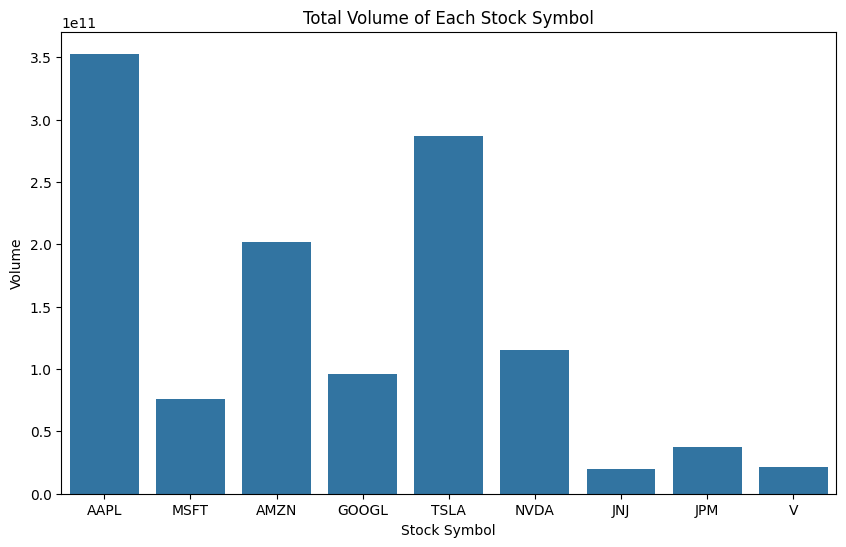

In [8]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to PostgreSQL
conn = psycopg2.connect(
    host='localhost',
    database='joelmendonsa',
    user='postgres',
    password='Duke#7539',
    port=5432
)

# Query stock details data from the database
query = "SELECT stock_symbol, volume FROM stock_details"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='stock_symbol', y='volume', data=df, estimator=sum, ci=None)
plt.title('Total Volume of Each Stock Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Volume')
plt.show()


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_37794/658620790.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


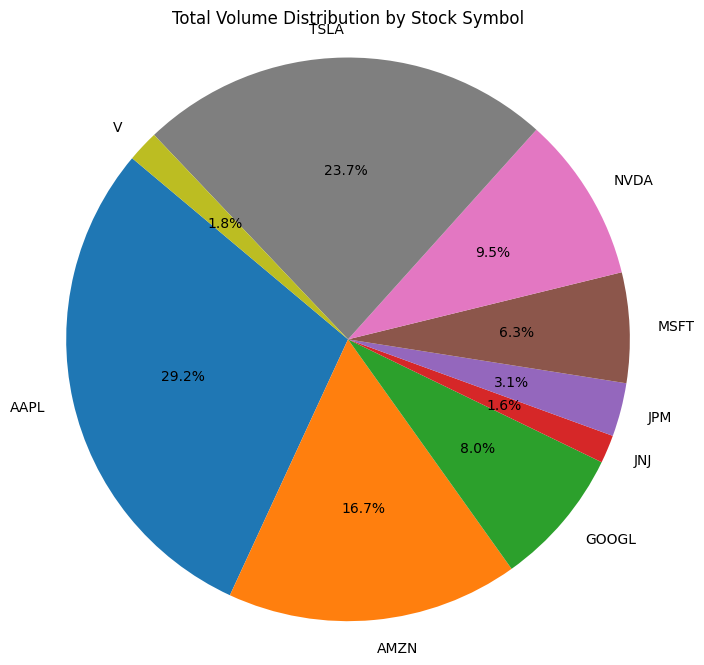

In [10]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Connect to PostgreSQL
conn = psycopg2.connect(
    host='localhost',
    database='joelmendonsa',
    user='postgres',
    password='Duke#7539',
    port=5432
)

# Query stock details data from the database
query = "SELECT stock_symbol, volume FROM stock_details"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Aggregate total volume for each stock symbol
volume_by_symbol = df.groupby('stock_symbol')['volume'].sum().reset_index()

# Plotting a pie chart
plt.figure(figsize=(8, 8))

plt.pie(volume_by_symbol['volume'], labels=volume_by_symbol['stock_symbol'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Volume Distribution by Stock Symbol')
plt.show()


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_37794/724227195.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


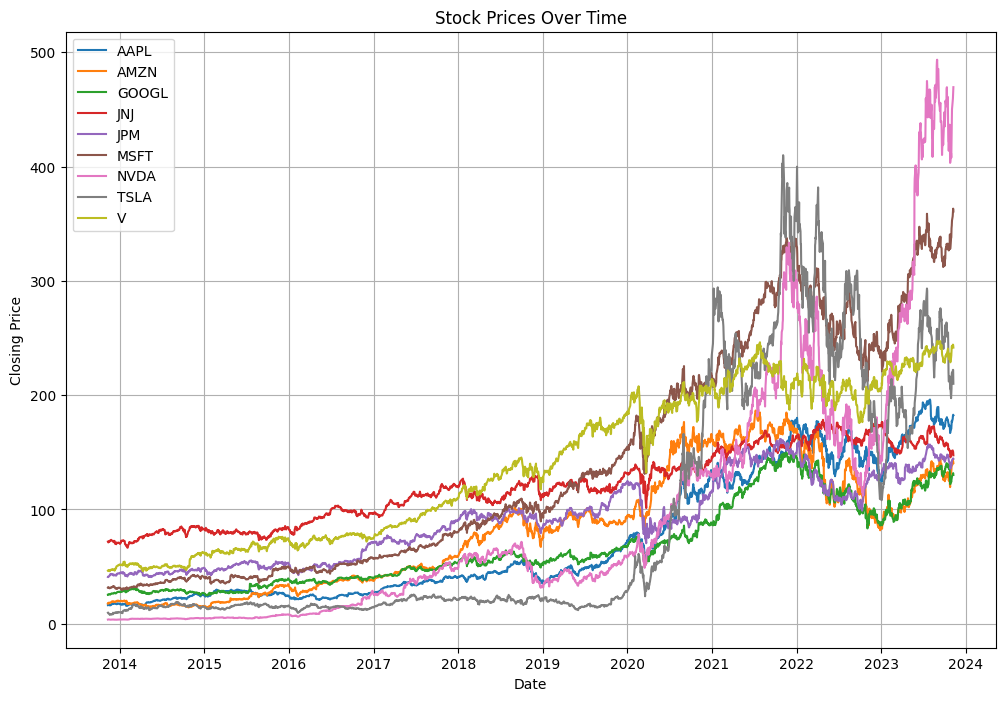

In [11]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Connect to PostgreSQL
conn = psycopg2.connect(
    host='localhost',
    database='joelmendonsa',
    user='postgres',
    password='Duke#7539',
    port=5432
)

# Query stock details data from the database
query = "SELECT stock_symbol, date, close FROM stock_details WHERE stock_symbol IN ('AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'NVDA', 'JNJ', 'JPM', 'V')"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Pivot the data for plotting the line graph
df_pivot = df.pivot(index='date', columns='stock_symbol', values='close')

# Plotting a line graph
plt.figure(figsize=(12, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], label=column)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()
